# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


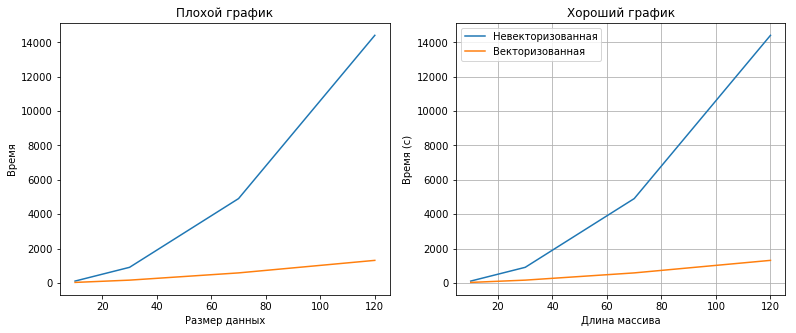

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [25]:
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import time

import functions_vectorized
import functions

reload(functions_vectorized)
reload(functions)

DIAG_SIZE = 1000
CNT_ITER = 400

data_size = []
time_non_vectorized = []
time_vectorized = []


i = 0
while i + 50 < DIAG_SIZE+1:
    i += 1
    time_vect = 0
    time_nvec = 0
    if i > 100:
        i += 10
    #сделал +10, т.к. больше комп не потянет
    data_size.append(i)
    for j in range(1, CNT_ITER):
        x = np.random.rand(i, np.random.randint(i, DIAG_SIZE+1))
        a = time.time()
        a1 = functions_vectorized.prod_non_zero_diag(x)
        time_vect += time.time() - a
        x = x.tolist()
        b = time.time()
        a2 = functions.prod_non_zero_diag(x)
        time_nvec += time.time() - b
        
        x = np.random.rand(np.random.randint(i, DIAG_SIZE+1), i)
        a = time.time()
        a1 = functions_vectorized.prod_non_zero_diag(x)
        time_vect += time.time() - a
        x = x.tolist()
        b = time.time()
        a2 = functions.prod_non_zero_diag(x)
        time_nvec += time.time() - b
    time_vectorized.append(time_vect/(2*CNT_ITER))
    time_non_vectorized.append(time_nvec/(2*CNT_ITER))
''' насчёт графика - если поставить значение, допустим DIAG_SIZE = 400 и CNT_ITER = 600 (как у других),
всё отлично работает. здесь же график такой(неточный немного) потому что я поставил до 1000 с шагом 10
Вы сказали на лекции ставить большие значения, а процессор больше не тянет'''

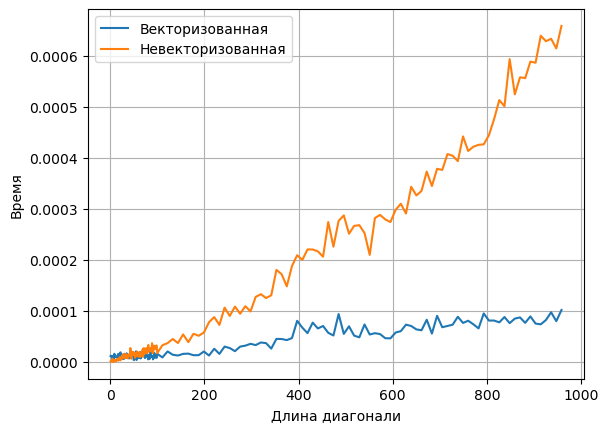

In [26]:
plt.plot(data_size, time_vectorized, label="Векторизованная")
plt.plot(data_size, time_non_vectorized, label="Невекторизованная")
plt.xlabel("Длина диагонали")
plt.ylabel("Время")
plt.legend()
plt.grid()
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [39]:
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import time

import functions_vectorized
import functions

reload(functions_vectorized)
reload(functions)

ARRAY_SIZE = 1000
CNT_ITER = 5000

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(1, ARRAY_SIZE):
    time_vect = 0
    time_nvec = 0
    data_size.append(i)
    for j in range(1, CNT_ITER):
        x = np.random.randint(-100000, 100000, i)
        y = np.random.randint(-100000, 100000, i)
        a = time.time()
        a1 = functions_vectorized.are_multisets_equal(x, y)
        time_vect += time.time() - a
        x = x.tolist()
        y = y.tolist()
        b = time.time()
        a2 = functions.are_multisets_equal(x, y)
        time_nvec += time.time() - b
    time_vectorized.append(time_vect/(CNT_ITER))
    time_non_vectorized.append(time_nvec/(CNT_ITER))

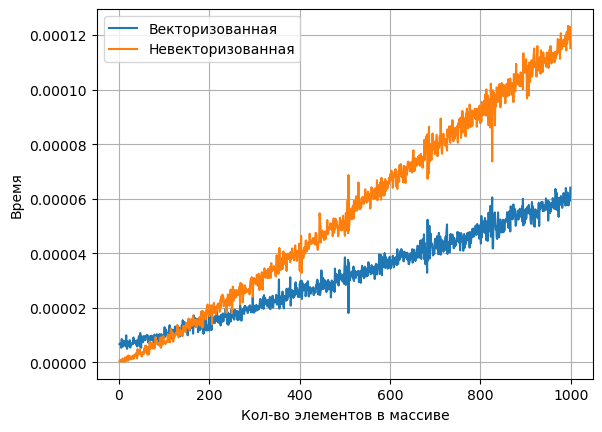

In [40]:
plt.plot(data_size, time_vectorized, label="Векторизованная")
plt.plot(data_size, time_non_vectorized, label="Невекторизованная")
plt.xlabel("Кол-во элементов в массиве")
plt.ylabel("Время")
plt.legend()
plt.grid()
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [44]:
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import time

import functions_vectorized
import functions

reload(functions_vectorized)
reload(functions)

ARRAY_SIZE = 1000
CNT_ITER = 5000

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(1, ARRAY_SIZE):
    time_vect = 0
    time_nvec = 0
    data_size.append(i)
    for j in range(1, CNT_ITER):
        x = np.random.randint(-100000, 100000, i)
        a = time.time()
        a1 = functions_vectorized.max_after_zero(x)
        time_vect += time.time() - a
        x = x.tolist()
        b = time.time()
        a2 = functions.max_after_zero(x)
        time_nvec += time.time() - b
    time_vectorized.append(time_vect/(CNT_ITER))
    time_non_vectorized.append(time_nvec/(CNT_ITER))

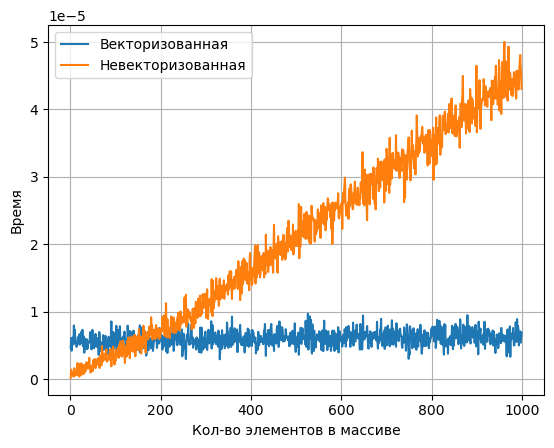

In [45]:
plt.plot(data_size, time_vectorized, label="Векторизованная")
plt.plot(data_size, time_non_vectorized, label="Невекторизованная")
plt.xlabel("Кол-во элементов в массиве")
plt.ylabel("Время")
plt.legend()
plt.grid()
plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


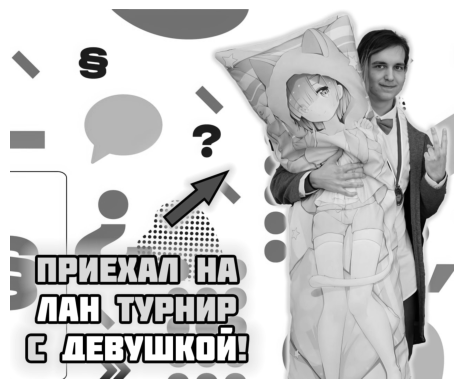

In [78]:
import matplotlib.pyplot as plt
from importlib import reload
from PIL import Image, ImageDraw
import numpy as np
import time
import functions_vectorized
import functions

reload(functions_vectorized)
reload(functions)

#сначала просто пример работы (чтобы изображение вывелось на экран)
img = np.array(Image.open("fairy_winks_love.png"))
color = np.array([0.299, 0.587, 0.114])
result = functions_vectorized.convert_image(img, color)
plt.imshow(result, cmap = "gray")
plt.axis("off")
plt.show()


COLOR_SIZE = 100
CNT_ITER = 20

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(1, COLOR_SIZE):
    time_vect = 0
    time_nvec = 0
    data_size.append(i)
    for j in range(1, CNT_ITER):
        color = np.random.randint(1, 100000, i)
        img = np.random.randint(100000, size=(np.random.randint(i, 101), np.random.randint(i,  101), i))
        a = time.time()
        a1 = functions_vectorized.convert_image(img, color)
        time_vect += time.time() - a
        color = color.tolist()
        img = img.tolist()
        b = time.time()
        a2 = functions.convert_image(img, color)
        time_nvec += time.time() - b
    time_vectorized.append(time_vect/(CNT_ITER))
    time_non_vectorized.append(time_nvec/(CNT_ITER))

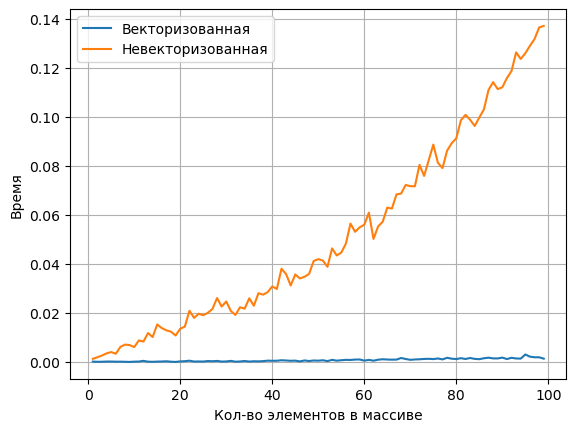

In [79]:
plt.plot(data_size, time_vectorized, label="Векторизованная")
plt.plot(data_size, time_non_vectorized, label="Невекторизованная")
plt.xlabel("Кол-во элементов в массиве")
plt.ylabel("Время")
plt.legend()
plt.grid()
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [4]:
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import time

import functions_vectorized
import functions

reload(functions_vectorized)
reload(functions)

ARRAY_SIZE = 5000
CNT_ITER = 1000

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(1, ARRAY_SIZE):
    time_vect = 0
    time_nvec = 0
    data_size.append(i)
    for j in range(1, CNT_ITER):
        x = np.random.randint(-100000, 100000, i)
        a = time.time()
        functions_vectorized.run_length_encoding(x)
        time_vect += time.time() - a
        x = x.tolist()
        b = time.time()
        functions.run_length_encoding(x)
        time_nvec += time.time() - b
    time_vectorized.append(time_vect/(CNT_ITER))
    time_non_vectorized.append(time_nvec/(CNT_ITER))

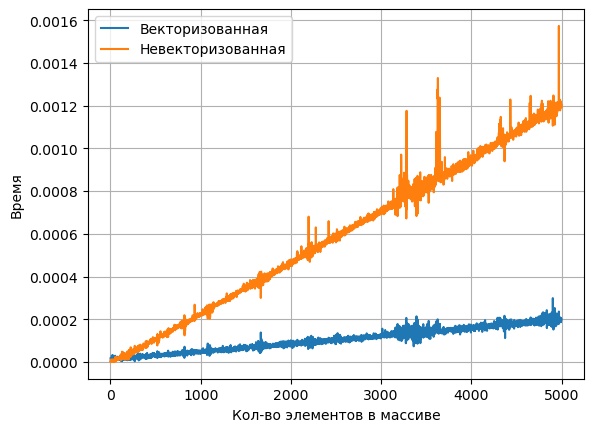

In [5]:
plt.plot(data_size, time_vectorized, label="Векторизованная")
plt.plot(data_size, time_non_vectorized, label="Невекторизованная")
plt.xlabel("Кол-во элементов в массиве")
plt.ylabel("Время")
plt.legend()
plt.grid()
plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [5]:
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import time
import math
import functions_vectorized
import functions
from scipy.spatial import distance

reload(functions_vectorized)
reload(functions)

ARRAY_SIZE = 600
CNT_ITER = 10

data_size = []
time_non_vectorized = []
time_vectorized = []
distancecdist = []

for i in range(1, ARRAY_SIZE):
    time_vect = 0
    time_nvec = 0
    time_f = 0
    data_size.append(i)
    for j in range(1, CNT_ITER):
        shape = (i, 2)
        x = np.random.rand(*shape)
        y = np.random.rand(*shape)
        a = time.time()
        a1 = functions_vectorized.pairwise_distance(x, y)
        time_vect += time.time() - a
        
        c = time.time()
        a3 = distance.cdist(x, y, 'euclidean')
        time_f += time.time() - c
        
        x = x.tolist()
        y = y.tolist()
        b = time.time()
        a2 = functions.pairwise_distance(x, y)
        time_nvec += time.time() - b
    time_vectorized.append(time_vect/(CNT_ITER))
    time_non_vectorized.append(time_nvec/(CNT_ITER))
    distancecdist.append(time_f/(CNT_ITER))

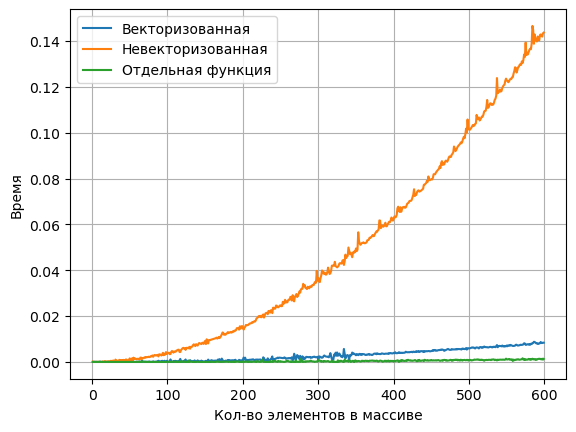

In [6]:
plt.plot(data_size, time_vectorized, label="Векторизованная")
plt.plot(data_size, time_non_vectorized, label="Невекторизованная")
plt.plot(data_size, distancecdist, label="Отдельная функция")
plt.xlabel("Кол-во элементов в массиве")
plt.ylabel("Время")
plt.legend()
plt.grid()
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

## Отчёт о ДЗ
В данной домашней работе я научился пользоваться ***nympy массивами***, научился строить графики ~~и вообще мне очень понравилось ml~~. Так же я понял, как работает *цветовая гамма изображения*.